In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [36]:
df = pd.read_csv(r'D:\Gawe\projects_learning\capstone_2\data\Airbnb Listings Bangkok.csv')
df.drop(['Unnamed: 0'], axis=1 ,inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.500000,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.030000,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [38]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                      0.365208
reviews_per_month                0.365208
name                             0.000505
host_name                        0.000063
id                               0.000000
host_id                          0.000000
neighbourhood                    0.000000
latitude                         0.000000
longitude                        0.000000
room_type                        0.000000
price                            0.000000
minimum_nights                   0.000000
number_of_reviews                0.000000
calculated_host_listings_count   0.000000
availability_365                 0.000000
number_of_reviews_ltm            0.000000
dtype: float64

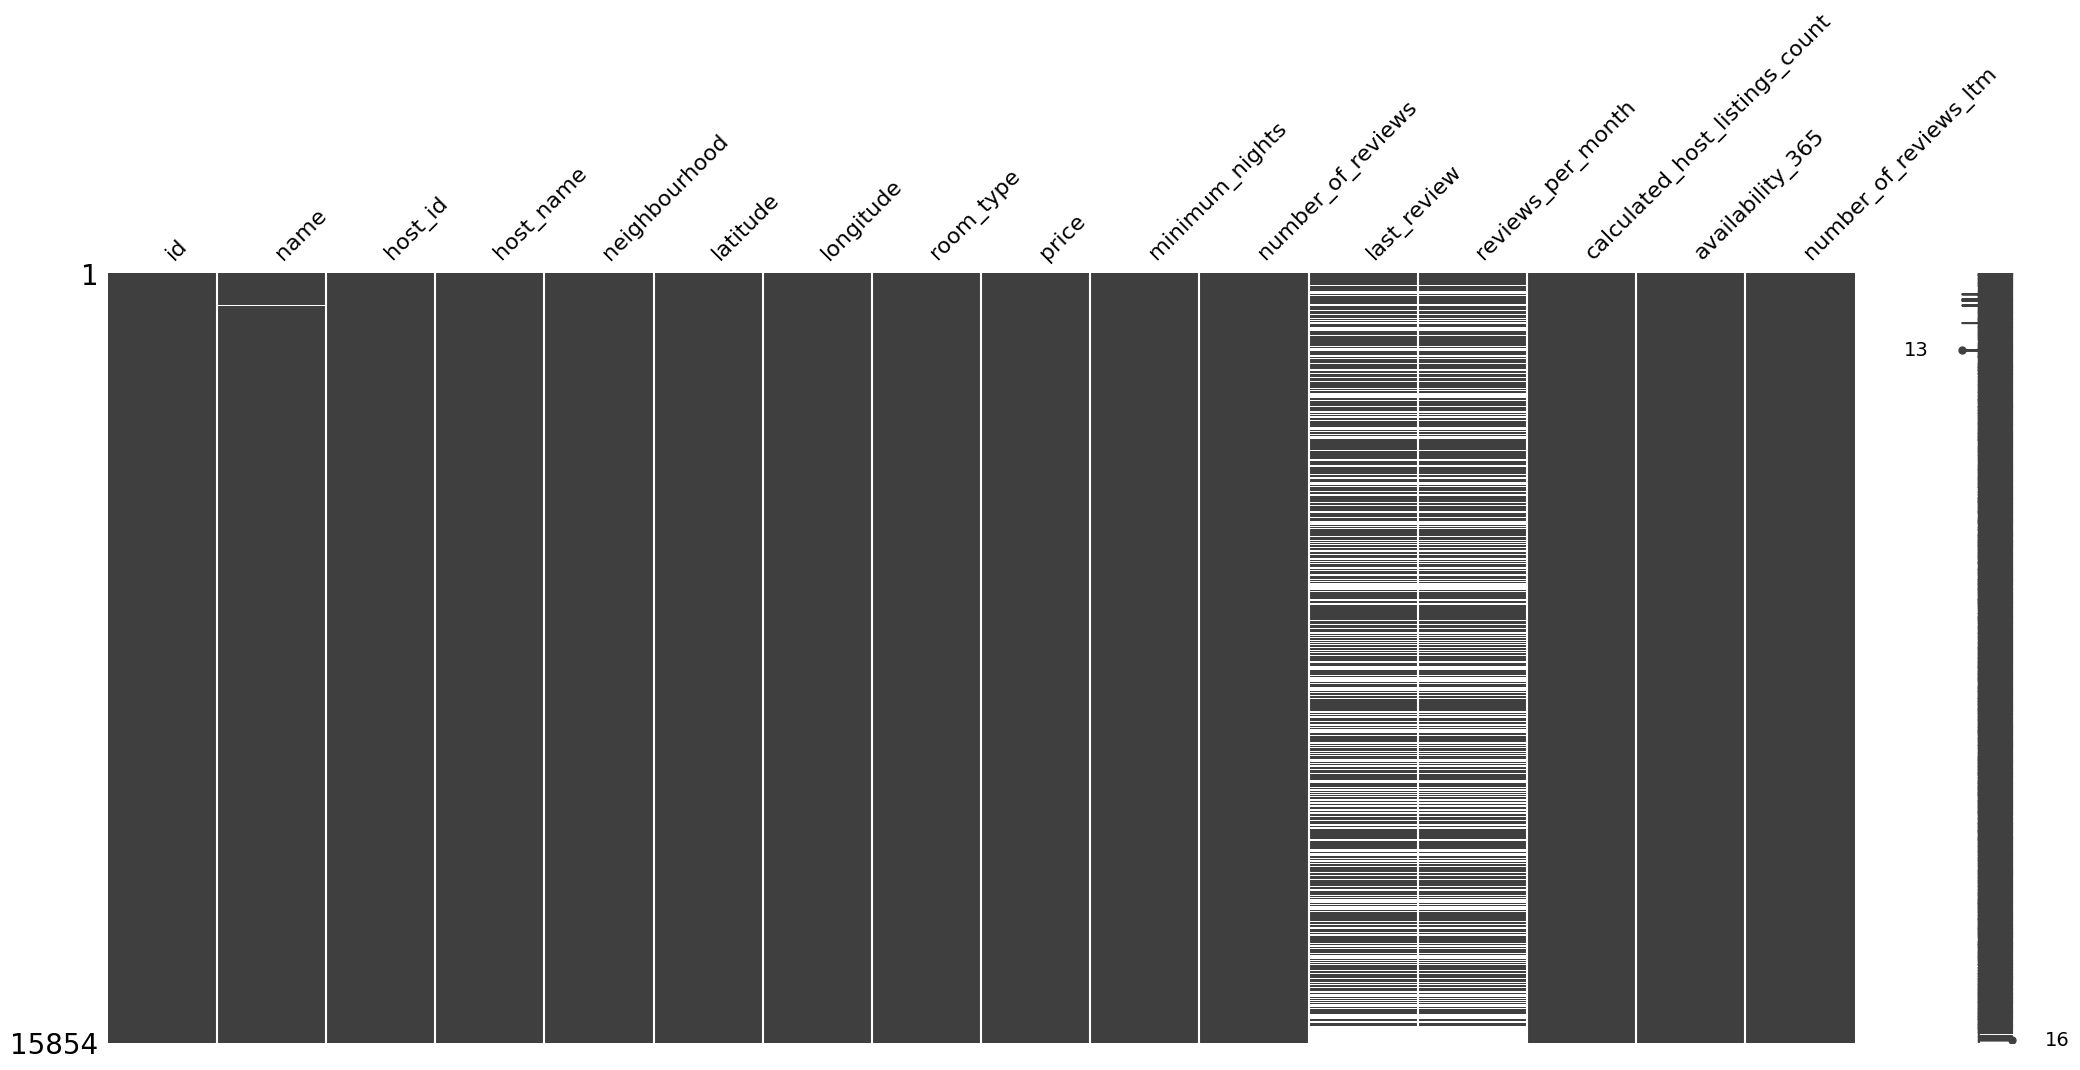

In [39]:
missingno.matrix(df)
plt.show()

In [24]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [40]:
# describe kolom2 numeric
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,3217.703923,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,24972.122358,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,900.000000,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1429.000000,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2429.000000,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,1100000.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


kolom price dan minimum_nights memiliki outliner

price > 75% dan max memiliki jarak yang jauh serta nilai min = 0 (tidak mungkin ada rental yang price nya 0)
minimum_nights > 75% dan max memiliki jarak yang jauh. standar properti dapat dikatakan penginapan juka pemiliki menyewakan properti dalam waktu kurang dari 30 hari. maka minimum_nights >30 dianggap bukan penginapan 

In [42]:
# mementukan outliner dari kolom price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR dari kolom price: ', iqr_price)
                                   
# menentukan limit atas dan bawah
upl_price = q3_price + 1 * iqr_price
lwl_price = q1_price - 1 * iqr_price

print('Limit atas kolom price: ', upl_price)
print('Limit bawah kolom price: ', lwl_price)

IQR dari kolom price:  1529.0
Limit atas kolom price:  3958.0
Limit bawah kolom price:  -629.0


In [46]:
# cek data dengan minimum nights diatas 30 hari
print("Ada {} data memiliki minimum nigths diatas 30 hari".format(len(df[df.minimum_nights > 30])))
print("Data tersebut mewakili {:.2f}% dari dataset".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Ada 868 data memiliki minimum nigths diatas 30 hari
Data tersebut mewakili 5.47% dari dataset


***cleansing after EDA***


In [47]:
# membuat duplikay datafame
df_new = df.copy(deep=True)


In [48]:
print(len(df))

15854


In [49]:
#hapus data yang tidak perlu hasil dari EDA

df_new.drop(df_new[df_new.price > upl_price].index, axis=0, inplace=True)
df_new.drop(df_new[df_new.price == 0.0].index, axis=0, inplace=True)
df_new.drop(df_new[df_new.minimum_nights > 30].index, axis=0, inplace=True)

print('Jumlah data sebelum dibersihkan: ', len(df))
print('Jumlah data setelah dibersihkan: ',len(df_new))
print(f'{round(((1 - (df_new.shape[0]/df.shape[0]))*100), 2)}% data telah dihapus.')

Jumlah data sebelum dibersihkan:  15854
Jumlah data setelah dibersihkan:  13223
16.6% data telah dihapus.


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

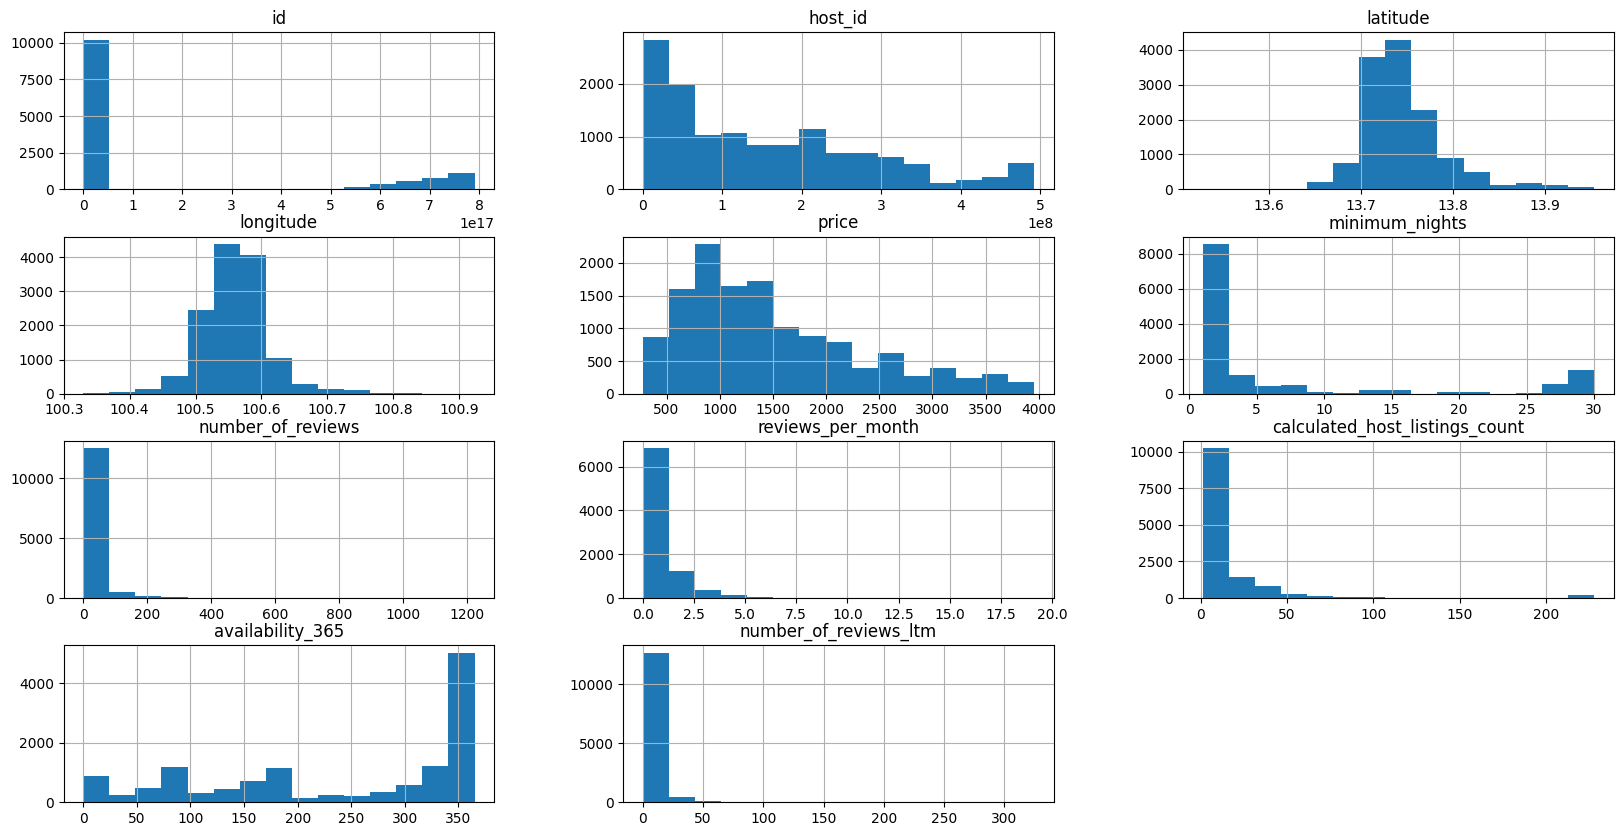

In [51]:
df_new.hist(bins=15, figsize=(20,10))

In [53]:
df_new.to_csv(r"D:\Gawe\projects_learning\capstone_2\data\Airbnb Listings Bangkok clean.csv")